In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

from paths import results_path

datasets = [
             'boston', #506, 13
             'concrete', #1030, 8
             'energy', #768, 8
             'kin8nm', #8192, 8
             'naval', #11934, 26
             'power', #9568, 4
             'protein', #45730, 9
             'wine_red', #1599, 22
]

models = [
#             'aepdgp_M100_its1000_L1_alpha0.001', # lr was 0.01 for these
#             'aepdgp_M100_its1000_L1_alpha0.5',
#             'aepdgp_M100_its1000_L1_alpha1.0',
            'aepdgp_M100_its10000_L1_alpha0.001', # lr = 1e-3
            'aepdgp_M100_its10000_L1_alpha0.5',
            'aepdgp_M100_its10000_L1_alpha1.0',
            'fitc_M100',
            'vfe_M100',
]

identifier = 'run_1'

cs = plt.cm.rainbow_r(np.linspace(0, 1, len(models)))
np.random.shuffle(cs)

def get_path(dataset, model, i):
    return '{}{}_{}_{}_{}.p'.format(results_path, dataset, model, identifier, i)

def load(dataset, model, i):
    path = get_path(dataset, model, i)
    if os.path.isfile(path):
        with open(path, 'r') as f:
            results = pickle.load(f)
        return results
    

In [2]:
def make_box_plots(datasets, ob):

    pos = np.arange(1, len(models) + 1)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(datasets), figsize=(12, 8), sharey=True)
    if len(datasets) == 1:
        axes = axes,
    
    for ax, dataset in zip(axes, datasets):
        ax.set_title(dataset)
        
        for p, model, c in zip(pos, models, cs):
        
            data = []
            for i in range(20):
                r = load(dataset, model, i)
                if r is not None:
                    data.append(r[ob])
                
            if len(data) > 3:
                mean = np.average(data)
                std_err = np.std(data)/(float(len(data))**0.5)
                ax.errorbar(mean, [p,], xerr=std_err, fmt='o', color=c)
                
            else:
                xlim = ax.get_xlim()    
                ax.plot([np.average(xlim),], [p,])
        
        
        ax.set_yticks([])
#         xlim = ax.get_xlim()
#         ax.set_xticks(np.linspace(xlim[0], xlim[1], 3))
        
    #    ax.get_yaxis().set_visible(False)
    axes[0].set_yticks(pos)
    axes[0].set_yticklabels(models)
#     plt.savefig('{}.pdf'.format(name), bbox_inches='tight')
    plt.show()

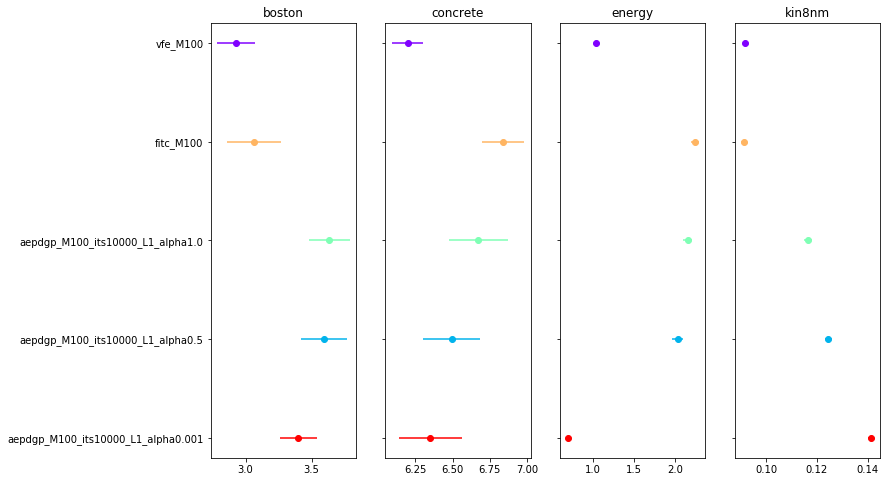

In [3]:
make_box_plots(datasets[:4], 'rmse')


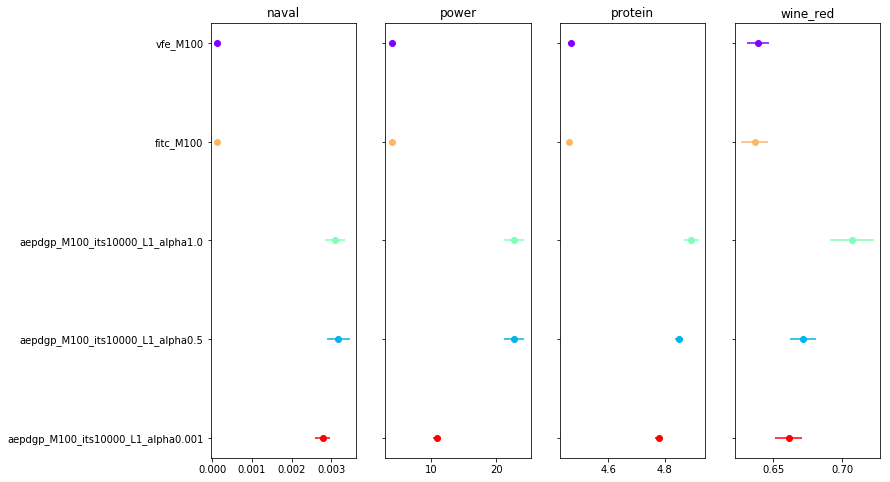

In [4]:
make_box_plots(datasets[4:8], 'rmse')
